In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import random
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from math import ceil
from scipy.spatial.distance import euclidean as eu
import cv2

In [5]:
no = 10

In [6]:
squares = []

for a in range(no):
    arr = np.ones((30,30))
    tl = 14-a
    br = 16 + a
    print([tl, tl], [br, br])
    image = cv2.rectangle(arr, (tl, tl), (br, br), (0, 0, 0), -1) 
    squares.append(image)

[14, 14] [16, 16]
[13, 13] [17, 17]
[12, 12] [18, 18]
[11, 11] [19, 19]
[10, 10] [20, 20]
[9, 9] [21, 21]
[8, 8] [22, 22]
[7, 7] [23, 23]
[6, 6] [24, 24]
[5, 5] [25, 25]


In [7]:
len(squares)

10

In [8]:
circles = []

for a in range(no):
    arr = np.ones((30,30))
    cx = 15
    cy = 15
    center_coordinates = (cx, cy) 
    radius = 1 + a 
    print([cx, cy, radius])
    image = cv2.circle(arr, center_coordinates, radius, (0, 0, 0), -1) 
    circles.append(image)

[15, 15, 1]
[15, 15, 2]
[15, 15, 3]
[15, 15, 4]
[15, 15, 5]
[15, 15, 6]
[15, 15, 7]
[15, 15, 8]
[15, 15, 9]
[15, 15, 10]


In [9]:
len(circles)

10

In [42]:
fft2d = []
for a in [circles, squares]:
    for shape in a:
        fft2 = np.fft.fft2(shape)
        fft2d.append(np.abs(fft2))

In [43]:
all_ = []
for a in range(no*2):
    all_.append(fft2d[a].reshape(900))

In [44]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_)
predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.zeros(10),np.ones(10)))

In [45]:
confusion_matrix(actual_labels,predicted_labels)

array([[6, 4],
       [5, 5]], dtype=int64)

In [46]:
accuracy_score(actual_labels,predicted_labels)*100

55.00000000000001

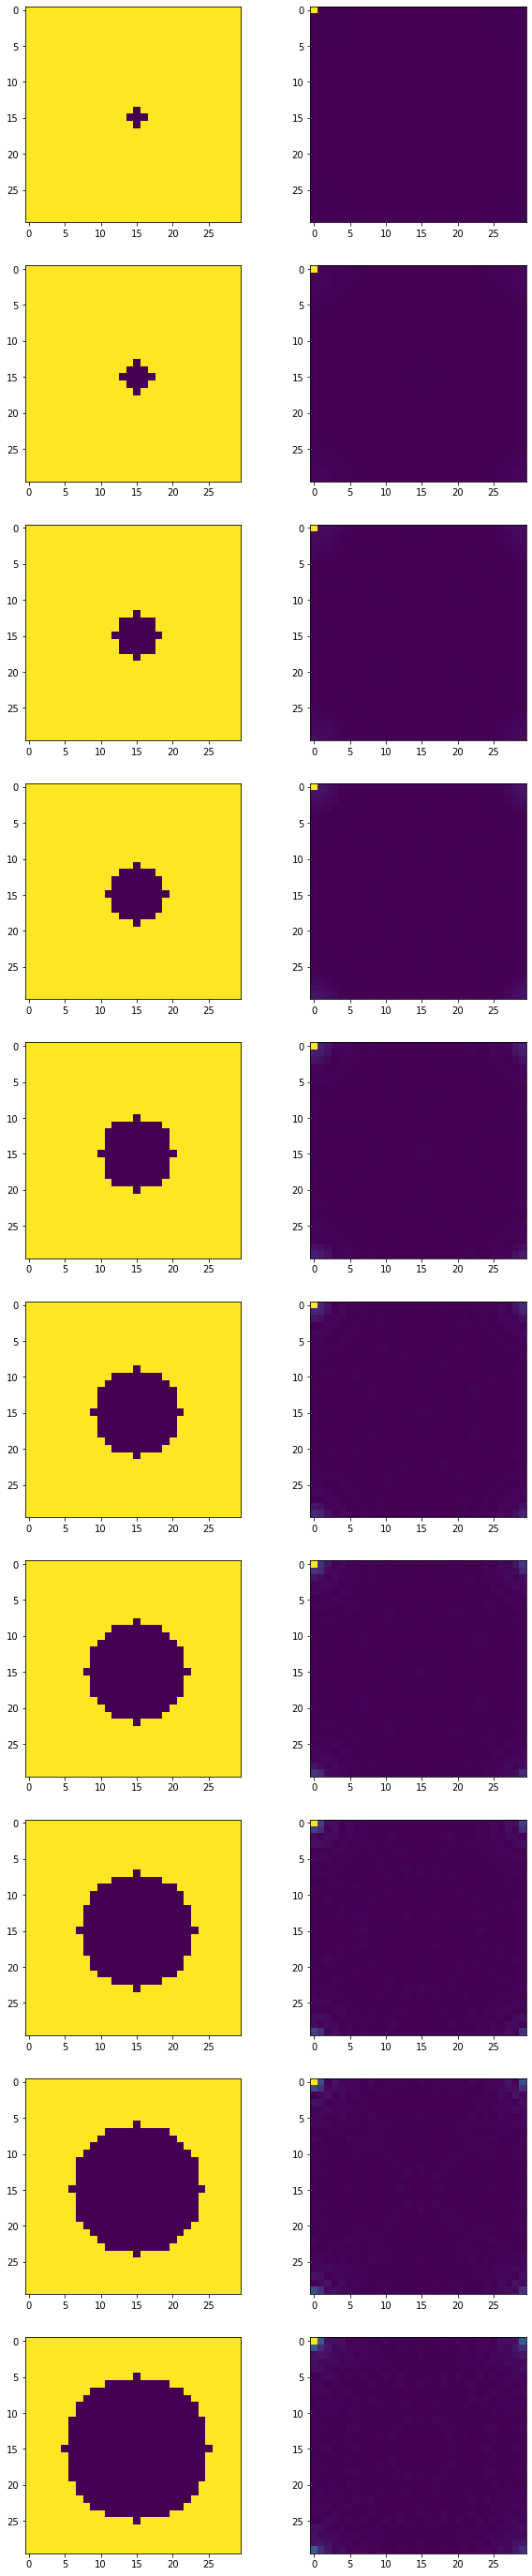

In [47]:
fig,ax =  plt.subplots(no,2,figsize=(10,50))
for a in range(no):
    ax[a][0].imshow(circles[a])
    ax[a][1].imshow(fft2d[a])

In [16]:
no1 = 8

In [31]:
squares_ = []

for a in range(no1):
    arr = np.ones(((a+3)*8, (a+3)*8))
    tl = (a+3)*3 
    br = (a+3)*5
    print([tl, tl], [br, br], (a+3)*8)
    print(np.shape(arr))
    image = cv2.rectangle(arr, (tl, tl), (br, br), (0, 0, 0), -1) 
    
    squares_.append(image)

[9, 9] [15, 15] 24
(24, 24)
[12, 12] [20, 20] 32
(32, 32)
[15, 15] [25, 25] 40
(40, 40)
[18, 18] [30, 30] 48
(48, 48)
[21, 21] [35, 35] 56
(56, 56)
[24, 24] [40, 40] 64
(64, 64)
[27, 27] [45, 45] 72
(72, 72)
[30, 30] [50, 50] 80
(80, 80)


In [33]:
circles_ = []

for a in range(no1):
    arr = np.ones(((a+3)*8, (a+3)*8))
    cx = (a+3)*4
    cy = (a+3)*4
    center_coordinates = (cx, cy) 
    radius = (a+3) 
    print([cx, cy, radius])
    print(np.shape(arr))
    image = cv2.circle(arr, center_coordinates, radius, (0, 0, 0), -1) 
    
    circles_.append(image)

[12, 12, 3]
(24, 24)
[16, 16, 4]
(32, 32)
[20, 20, 5]
(40, 40)
[24, 24, 6]
(48, 48)
[28, 28, 7]
(56, 56)
[32, 32, 8]
(64, 64)
[36, 36, 9]
(72, 72)
[40, 40, 10]
(80, 80)


In [24]:
def binning(bins, fft, overlap_per):
    div_size = len(fft)/bins
    bin_size = div_size*(1+(overlap_per/100))
    half_bin = bin_size/2
    
    binned = []
    
    current_step = bin_size
    for a in range(bins):
        
        pos = np.ceil(half_bin + a*(div_size))
        start = 0 if a == 0 else int(np.ceil(pos - half_bin))
        end = -1 if a == (bins-1) else int(np.ceil(pos + half_bin))
        #print([start, end])
        
        binned = np.append(binned, sum(np.abs(fft[start : end]))) 
        
    return binned

In [39]:
fft2d1 = []
bins = min(min([len(a[0]) for a in circles_]), min([len(a[0]) for a in squares_]))
for a in [circles_, squares_]:
    for shape in a:
        rows = []
        for a in shape:
            fft = np.fft.fft(a)
            bin_per = np.ceil(len(fft)/bins)
            rows.append(binning(bins, fft, bin_per).tolist())

        rows = np.transpose(rows)

        cols = []
        for a in rows:
            fft = np.fft.fft(a)
            cols.append(binning(bins, fft, bin_per).tolist())

        final = np.transpose(cols)

        fft2d1.append(final)

In [54]:
all_binned = []
for a in range(no1*2):
    all_binned.append(fft2d1[a].reshape(bins**2))

In [55]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_binned)
predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.zeros(no1),np.ones(no1)))

In [56]:
confusion_matrix(actual_labels,predicted_labels)

array([[5, 3],
       [5, 3]], dtype=int64)

In [57]:
accuracy_score(actual_labels,predicted_labels)*100

50.0